In [ ]:
#Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

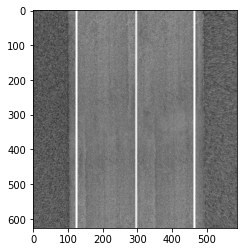

In [ ]:
#Load image and make grayscale
img=cv2.imread("road.jpg")  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

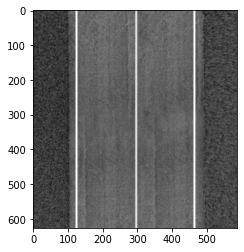

In [ ]:
#Adding Gaussian blurring
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
plt.imshow(blurred,cmap="gray")

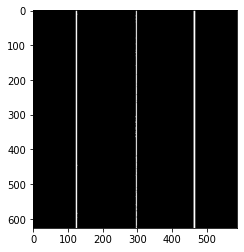

In [ ]:
#Filtering Pixels
filterr=cv2.threshold(blurred,230,255,cv2.THRESH_BINARY)[1]
plt.imshow(filterr,cmap="gray")

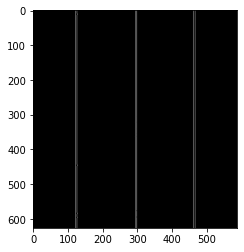

In [ ]:
#Apply canny edge detector
canny_edges = cv2.Canny(filterr,200,255)
plt.imshow(canny_edges,cmap="gray")

In [ ]:
#Detecting lines
lines = cv2.HoughLinesP(
    canny_edges,
    rho=3,
    theta=np.pi / 180,
    threshold=100,
    lines=np.array([]),
    minLineLength=20,
    maxLineGap=20
)

line_x=[]
for line in lines:
    line=line[0]
    line_x.append(line[0])
    cv2.line(img, (line[0],line[1]), (line[2],line[3]), (255,0,0), 1) 
    
line_x.sort()
print(line_x)

[122, 126, 295, 298, 461, 466]


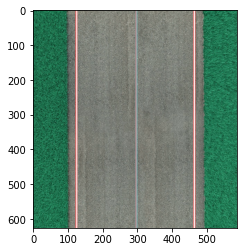

In [ ]:
plt.imshow(img)

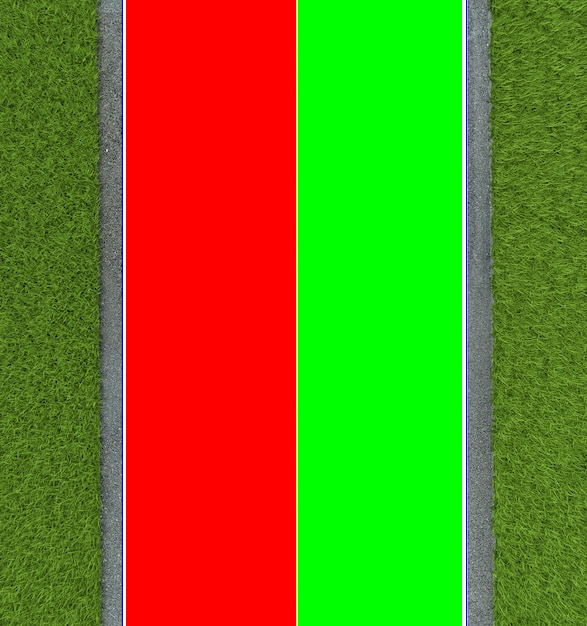

In [ ]:
for index,x_point in enumerate(line_x):
    if index==2:
        cv2.rectangle(img, (line_x[index-1], 0), (x_point, img.shape[0]), (0,0,255),-1)
    elif index==4:
        cv2.rectangle(img,(line_x[index-1], 0), (x_point, img.shape[0]), (0,255,0),-1)
        break
    
cv2_imshow(img)